* Define Objective  
1 - what are the most popular song in 2023?  
2- What is the Most Time that's Releases Tracks?   
3- with the best track and by who how?  
4- What are the tracks for most posts in Ticktock?  
5- how many likes and views for each track?  
5- number of songs released till 2024

In [178]:
import missingno as msno

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [180]:
df = pd.read_csv("D:\T5\Most Streamed Spotify Songs 2024.csv", encoding="unicode_escape")

df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [182]:
df.describe()

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,0.0,4600.000000
mean,41.844043,63.501581,54.60312,32.310954,25.348942,NaN,0.358913
std,38.543766,16.186438,71.61227,54.274538,25.989826,NaN,0.479734
min,19.400000,1.000000,1.00000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.00000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.00000,15.000000,17.000000,NaN,0.000000
75%,44.425000,73.000000,70.00000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.00000,632.000000,210.000000,NaN,1.000000


In [183]:
df.isnull().sum()

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

<Axes: >

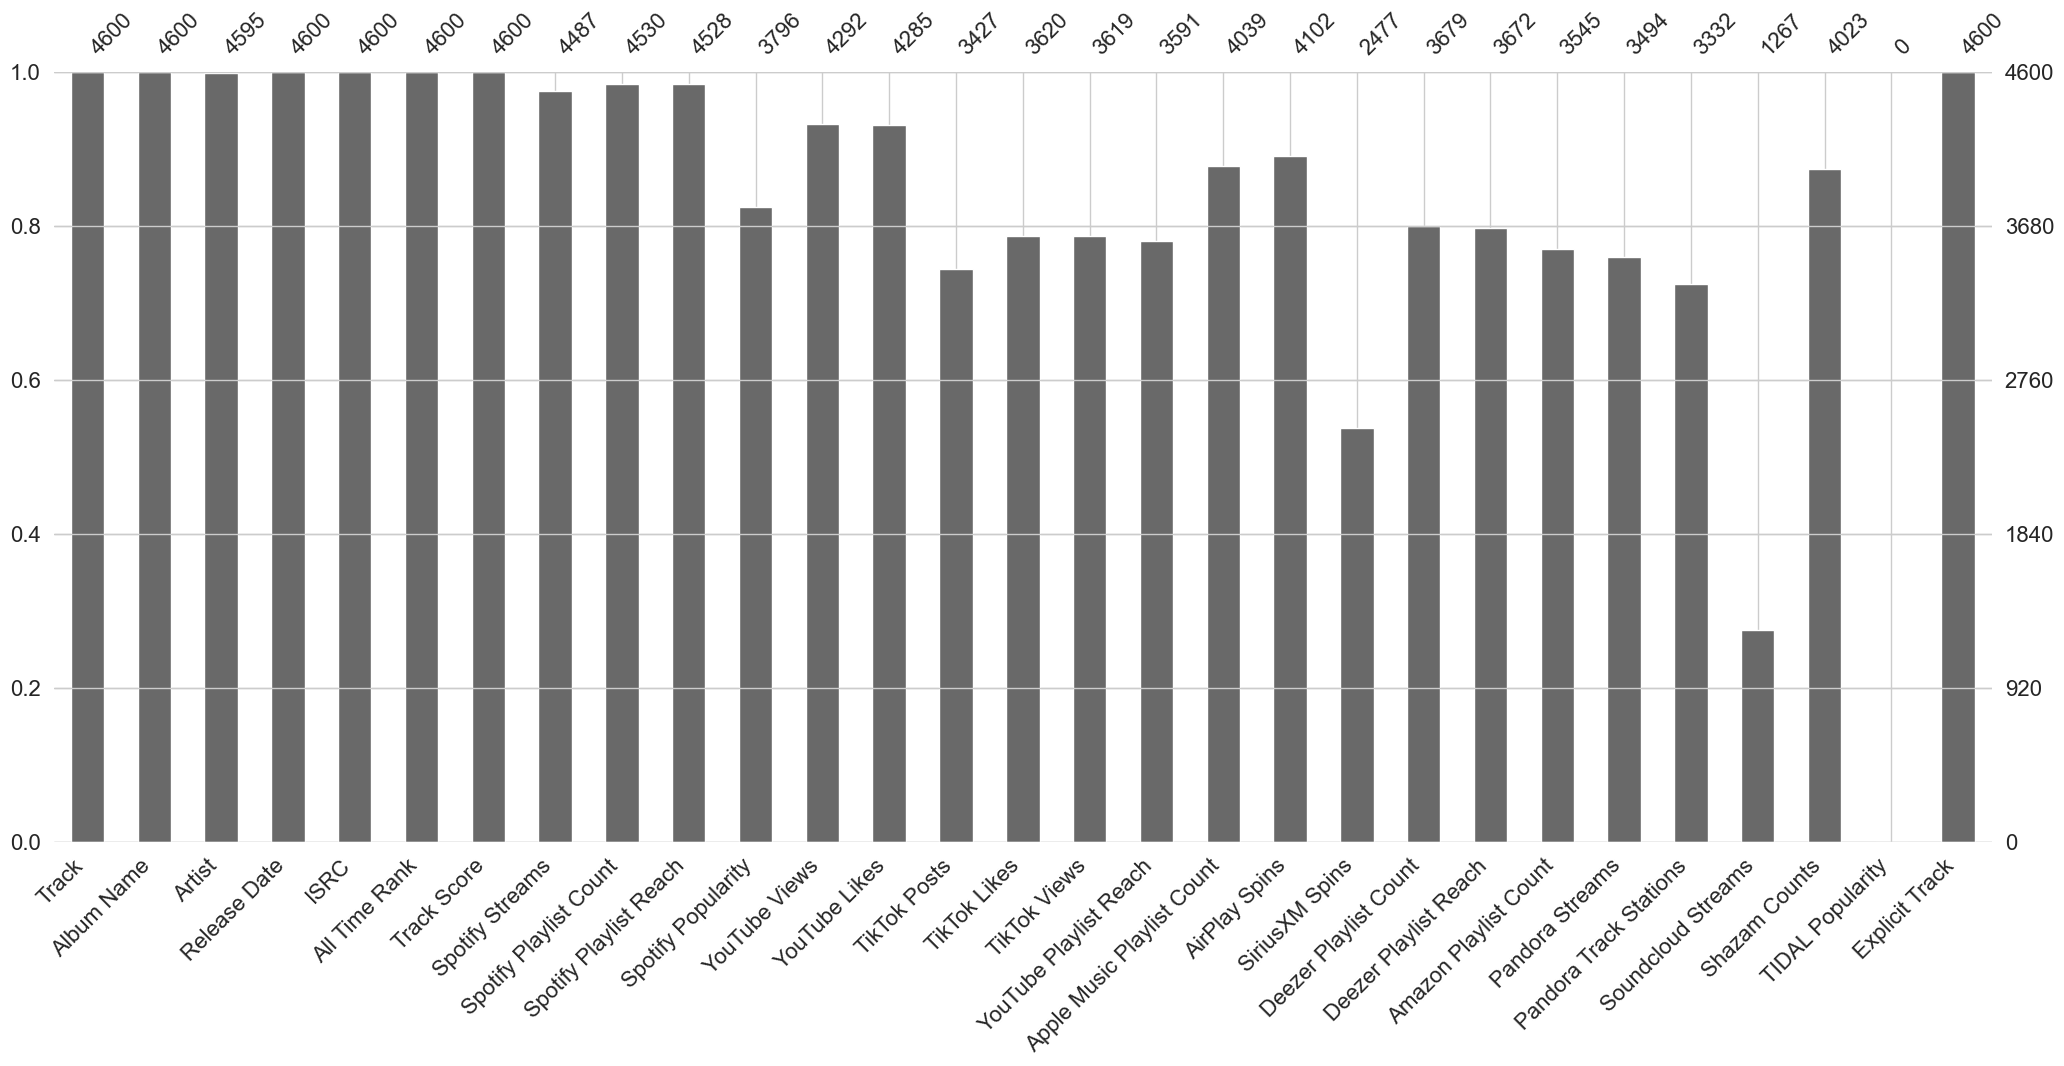

In [184]:
# Vizulaize null values
plt.figure(figsize=(5,5));
msno.bar(df)

In [185]:
# Dropping soundcloud streams and tidal popularity columns, since most values are missing
df.drop(['TIDAL Popularity','Soundcloud Streams','SiriusXM Spins','Apple Music Playlist Count'],axis=1,inplace=True)


In [186]:
#Dropping unneceecry columns
df.drop(['Amazon Playlist Count','Pandora Streams','Pandora Track Stations'],axis=1,inplace=True)

In [187]:
df.dtypes

Track                      object
Album Name                 object
Artist                     object
Release Date               object
ISRC                       object
All Time Rank              object
Track Score               float64
Spotify Streams            object
Spotify Playlist Count     object
Spotify Playlist Reach     object
Spotify Popularity        float64
YouTube Views              object
YouTube Likes              object
TikTok Posts               object
TikTok Likes               object
TikTok Views               object
YouTube Playlist Reach     object
AirPlay Spins              object
Deezer Playlist Count     float64
Deezer Playlist Reach      object
Shazam Counts              object
Explicit Track              int64
dtype: object

In [188]:
# Change the Release date data type
df['Release Date'] = pd.to_datetime(df['Release Date'],format='%m/%d/%Y')

In [189]:
df['Spotify Playlist Count'].unique()

array(['30,716', '28,113', '54,331', ..., '72,066', '14,037', '32,138'],
      dtype=object)

In [190]:
df['Artist'] = df['Artist'].fillna('Unknown')

In [191]:
#Cheking no null values exist
df.Artist.isnull().sum()

0

In [192]:
# Handling spotify streams
df['Spotify Streams'] = df['Spotify Streams'].ffill()

In [193]:
df['Spotify Streams'].isnull().sum()

0

In [194]:
#Handle Spotify Playlist Count
df['Spotify Playlist Count'].unique()

array(['30,716', '28,113', '54,331', ..., '72,066', '14,037', '32,138'],
      dtype=object)

In [195]:
def fill_with_mode(series):
    mode_value = series.mode()
    if not mode_value.empty:
        return series.fillna(mode_value[0])
    return series

In [196]:
df['Spotify Playlist Count'] = df.groupby('Album Name')['Spotify Playlist Count'].fillna(fill_with_mode)

In [197]:
df['Spotify Playlist Count'].isnull().sum()

0

In [198]:
df['Spotify Playlist Reach'] = df.groupby(['Album Name','Spotify Playlist Count'])['Spotify Playlist Reach'].fillna(fill_with_mode)

In [199]:
#Making sure null values are filled
df['Spotify Playlist Reach'].isnull().sum()

0

In [200]:
df['Spotify Popularity'] = df.groupby(['Album Name','Spotify Playlist Count','Spotify Playlist Reach'])['Spotify Popularity'].fillna(fill_with_mode)

In [201]:
#df['Spotify Popularity'].isnull().sum()

In [202]:
# Titok posts string, must convert it to numerical column first
df['TikTok Posts'] = pd.to_numeric(df['TikTok Posts'], errors='coerce')

# Fill missing values with the mean
df['TikTok Posts'].fillna(df['TikTok Posts'].mean(), inplace=True)

In [203]:
df['YouTube Views'] = df.groupby(['Album Name','All Time Rank','Artist','Release Date'])['YouTube Views'].fillna(fill_with_mode)

In [204]:
df['YouTube Likes'] = df.groupby(['Album Name','All Time Rank','Artist','Release Date','YouTube Views'])['YouTube Views'].fillna(fill_with_mode)

In [205]:
df['TikTok Views'] = df.groupby(['All Time Rank','Release Date'])['TikTok Views'].fillna(fill_with_mode)

In [206]:
df['TikTok Likes'] = df.groupby(['All Time Rank','Release Date','TikTok Views'])['TikTok Likes'].fillna(fill_with_mode)

In [207]:

df['YouTube Playlist Reach']= df['YouTube Playlist Reach'].str.replace(',', '')

df['YouTube Playlist Reach'] = pd.to_numeric(df['YouTube Playlist Reach'])

youtube_reach_mean = df['YouTube Playlist Reach'].mean()


# Fill missing values with the mean values
df['YouTube Playlist Reach'].fillna(youtube_reach_mean)

0       1.505970e+08
1       1.563804e+08
2       3.737850e+08
3       3.351189e+09
4       1.127639e+08
            ...     
4595    5.301600e+04
4596    2.497305e+07
4597    2.925315e+07
4598    2.515052e+07
4599    1.758314e+08
Name: YouTube Playlist Reach, Length: 4600, dtype: float64

In [208]:
df['Deezer Playlist Count'] = df.groupby(['Album Name','Artist','Release Date'])['Deezer Playlist Count'].fillna(fill_with_mode)



In [209]:
df['Deezer Playlist Reach'].isnull().sum()

928

In [210]:
df['Deezer Playlist Reach'] = df.groupby(['Album Name','Artist','Release Date'])['Deezer Playlist Reach'].fillna(fill_with_mode)


In [211]:
df['Deezer Playlist Reach'].unique()

array(['17,598,718', '10,422,430', '36,321,847', ..., '14,217', '74',
       '127,479'], dtype=object)

In [212]:
df['AirPlay Spins'] = df['AirPlay Spins'].str.replace(',', '')

df['AirPlay Spins'] = pd.to_numeric(df['AirPlay Spins'])

# Fill missing values with the mean values
df['AirPlay Spins'].fillna(df['AirPlay Spins'].mean())


0         40975.0
1         40778.0
2         74333.0
3       1474799.0
4         12185.0
          ...    
4595          6.0
4596        412.0
4597        204.0
4598       1200.0
4599       2083.0
Name: AirPlay Spins, Length: 4600, dtype: float64

In [213]:
df.isnull().sum()

Track                        0
Album Name                   0
Artist                       0
Release Date                 0
ISRC                         0
All Time Rank                0
Track Score                  0
Spotify Streams              0
Spotify Playlist Count       0
Spotify Playlist Reach       0
Spotify Popularity           0
YouTube Views                0
YouTube Likes                0
TikTok Posts                 0
TikTok Likes                 0
TikTok Views                 0
YouTube Playlist Reach    1009
AirPlay Spins              498
Deezer Playlist Count        0
Deezer Playlist Reach        0
Shazam Counts              577
Explicit Track               0
dtype: int64

In [214]:
df['Shazam Counts'] = df.groupby(['Album Name','Artist','Release Date'])['Shazam Counts'].fillna(fill_with_mode)

In [215]:
df.isnull().sum()

Track                        0
Album Name                   0
Artist                       0
Release Date                 0
ISRC                         0
All Time Rank                0
Track Score                  0
Spotify Streams              0
Spotify Playlist Count       0
Spotify Playlist Reach       0
Spotify Popularity           0
YouTube Views                0
YouTube Likes                0
TikTok Posts                 0
TikTok Likes                 0
TikTok Views                 0
YouTube Playlist Reach    1009
AirPlay Spins              498
Deezer Playlist Count        0
Deezer Playlist Reach        0
Shazam Counts                0
Explicit Track               0
dtype: int64

In [216]:
# Remove any track have ý name 
mask = df['Track'].str.contains('ý')

df = df[~mask]

In [262]:
df = df.dropna(subset=['Shazam Counts', 'Deezer Playlist Count','TikTok Likes','TikTok Views'])

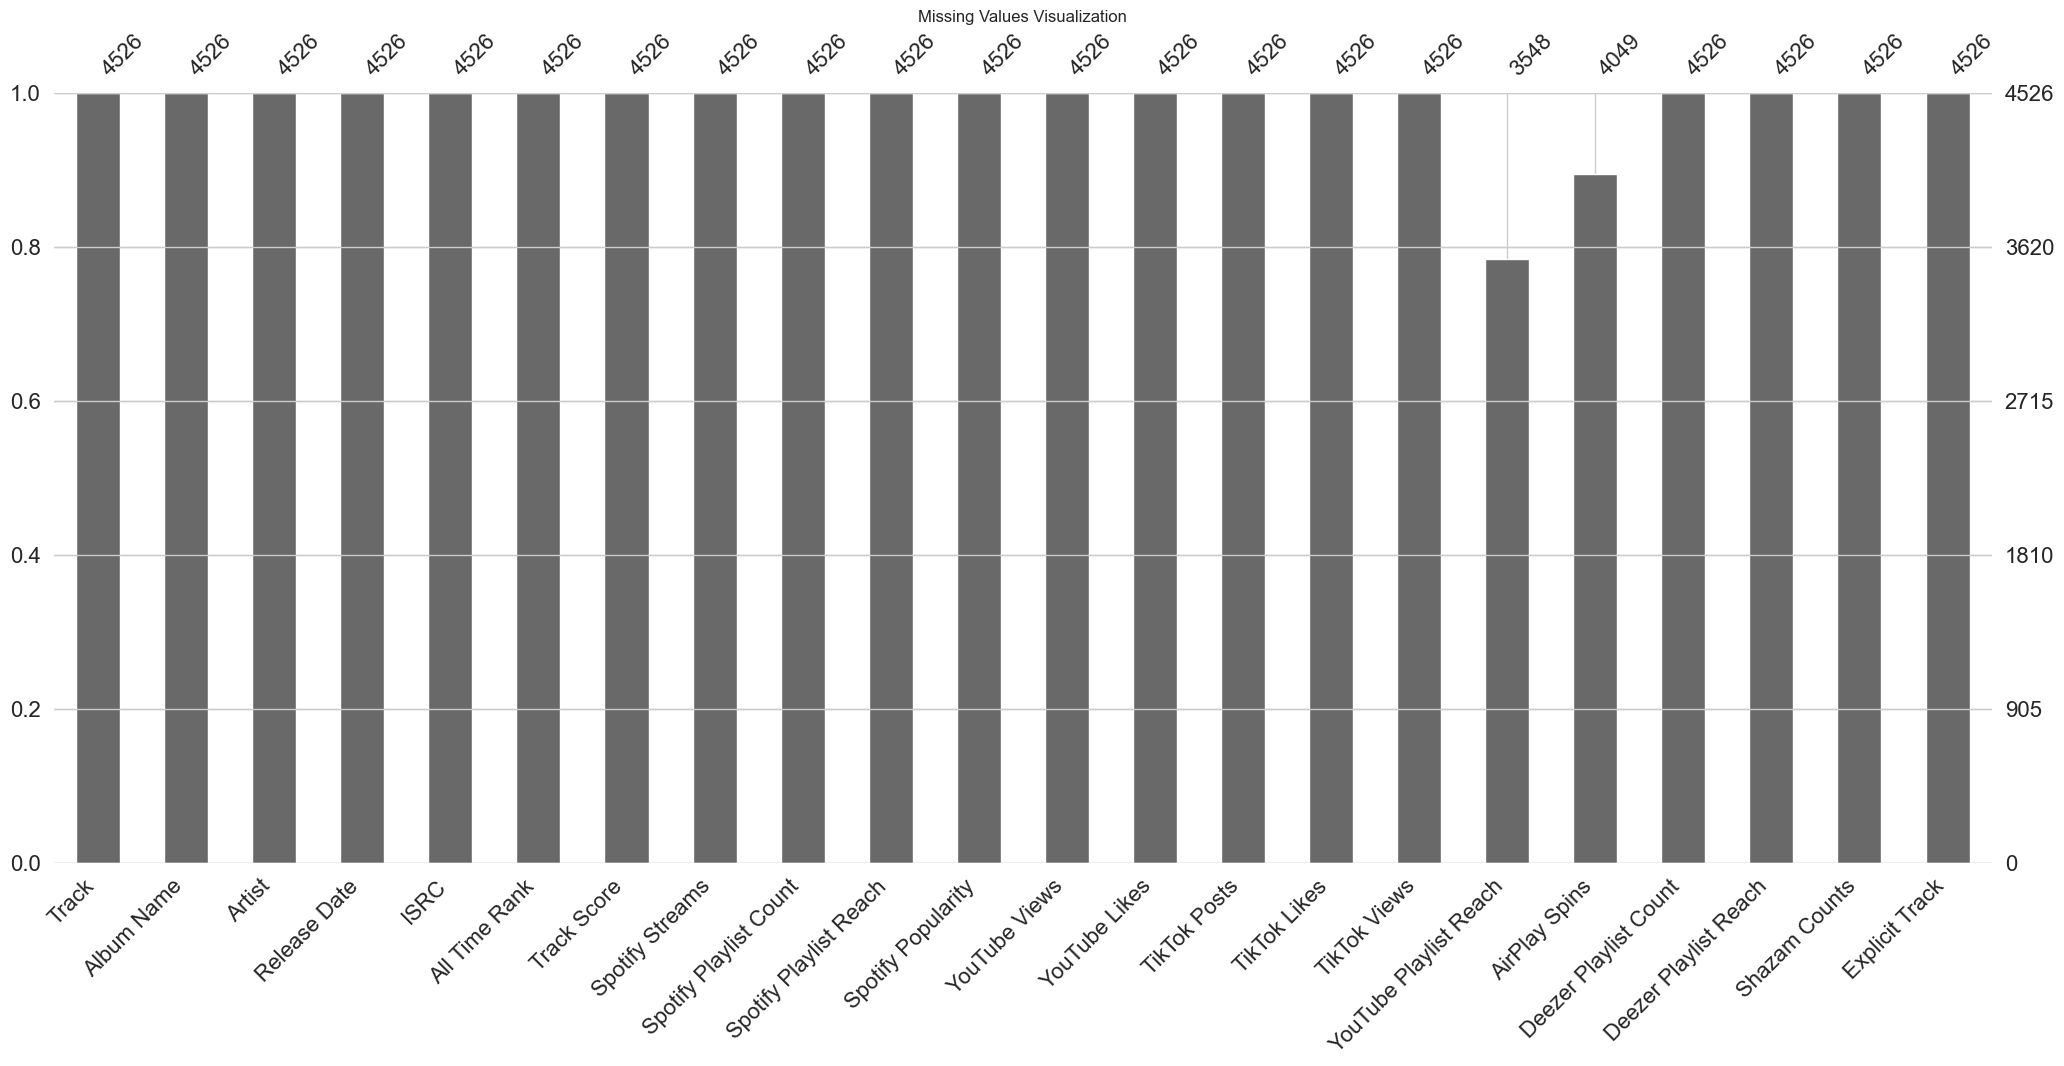

In [218]:
msno.bar(df)
plt.title("Missing Values Visualization")
plt.show()

## Check Data types

In [219]:
df.dtypes

Track                             object
Album Name                        object
Artist                            object
Release Date              datetime64[ns]
ISRC                              object
All Time Rank                     object
Track Score                      float64
Spotify Streams                   object
Spotify Playlist Count            object
Spotify Playlist Reach            object
Spotify Popularity                object
YouTube Views                     object
YouTube Likes                     object
TikTok Posts                     float64
TikTok Likes                      object
TikTok Views                      object
YouTube Playlist Reach           float64
AirPlay Spins                    float64
Deezer Playlist Count             object
Deezer Playlist Reach             object
Shazam Counts                     object
Explicit Track                     int64
dtype: object

In [220]:
df['All Time Rank'].unique()

array(['1', '2', '3', ..., '4,571', '4,591', '4,593'], dtype=object)

In [221]:
df['All Time Rank'] = df['All Time Rank'].str.replace(',', '')
df['All Time Rank'] = df['All Time Rank'].astype(int)

In [222]:
df['Spotify Streams'] = df['Spotify Streams'].str.replace(',', '')
df['Spotify Streams'] = df['Spotify Streams'].astype('Int64')

In [223]:
df['Spotify Playlist Count'].isnull().sum()

0

In [224]:
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].str.replace(',', '')


In [225]:
# Convert the column to numeric
df['Spotify Playlist Count'] = pd.to_numeric(df['Spotify Playlist Count'])

In [226]:
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].fillna(0).astype(int)


In [227]:
df['Spotify Playlist Count'].isnull().sum()

0

In [228]:
df.dtypes

Track                             object
Album Name                        object
Artist                            object
Release Date              datetime64[ns]
ISRC                              object
All Time Rank                      int32
Track Score                      float64
Spotify Streams                    Int64
Spotify Playlist Count             int32
Spotify Playlist Reach            object
Spotify Popularity                object
YouTube Views                     object
YouTube Likes                     object
TikTok Posts                     float64
TikTok Likes                      object
TikTok Views                      object
YouTube Playlist Reach           float64
AirPlay Spins                    float64
Deezer Playlist Count             object
Deezer Playlist Reach             object
Shazam Counts                     object
Explicit Track                     int64
dtype: object

In [229]:
df['YouTube Likes'] = df['YouTube Likes'].str.replace(',', '')
df['YouTube Likes'] =  pd.to_numeric(df['YouTube Likes']).astype('Int64')

In [230]:
df['YouTube Views'] = df['YouTube Views'].str.replace(',', '')

df['YouTube Views'] =  pd.to_numeric(df['YouTube Views']).astype('Int64')

In [231]:
df['TikTok Views'] = df['TikTok Views'].str.replace(',', '')
df['TikTok Views'] = pd.to_numeric(df['TikTok Views']).astype('Int64')

In [232]:
df.dtypes

Track                             object
Album Name                        object
Artist                            object
Release Date              datetime64[ns]
ISRC                              object
All Time Rank                      int32
Track Score                      float64
Spotify Streams                    Int64
Spotify Playlist Count             int32
Spotify Playlist Reach            object
Spotify Popularity                object
YouTube Views                      Int64
YouTube Likes                      Int64
TikTok Posts                     float64
TikTok Likes                      object
TikTok Views                       Int64
YouTube Playlist Reach           float64
AirPlay Spins                    float64
Deezer Playlist Count             object
Deezer Playlist Reach             object
Shazam Counts                     object
Explicit Track                     int64
dtype: object

In [233]:

df['YouTube Playlist Reach'] = df['YouTube Playlist Reach'].astype('Int64')

In [234]:
df['AirPlay Spins'] = df['AirPlay Spins'].astype('Int64')

In [235]:
df['Deezer Playlist Count'] = pd.to_numeric(df['Deezer Playlist Count'], errors='coerce').astype('Int64')  # Convert to numeric, call astype on the result of pd.to_numeric

In [236]:
df['Deezer Playlist Reach'] = df['Deezer Playlist Reach'].str.replace(',', '')  # Convert to string
df['Deezer Playlist Reach'] = pd.to_numeric(df['Deezer Playlist Reach'], errors='coerce').astype('Int64')  # Convert to numeric

In [237]:
df['Shazam Counts'] = df['Shazam Counts'].str.replace(',', '')  # Convert to string
df['Shazam Counts'] = pd.to_numeric(df['Shazam Counts'], errors='coerce').astype('Int64')  # Convert to numeric, call astype on the result of pd.to_numeric

In [238]:
# Tiktok posts is float column, i will convvert it to int
df['TikTok Posts'].astype(np.int64)

0       329
1       329
2       329
3       329
4       329
       ... 
4595    329
4596    329
4597    329
4598    329
4599    329
Name: TikTok Posts, Length: 4526, dtype: int64

In [239]:
df['TikTok Likes'] = df['TikTok Likes'].str.replace(',', '')  # Convert to string
df['TikTok Likes'] = pd.to_numeric(df['TikTok Likes'], errors='coerce').astype('Int64')

##  Checking data types

In [240]:
df.dtypes

Track                             object
Album Name                        object
Artist                            object
Release Date              datetime64[ns]
ISRC                              object
All Time Rank                      int32
Track Score                      float64
Spotify Streams                    Int64
Spotify Playlist Count             int32
Spotify Playlist Reach            object
Spotify Popularity                object
YouTube Views                      Int64
YouTube Likes                      Int64
TikTok Posts                     float64
TikTok Likes                       Int64
TikTok Views                       Int64
YouTube Playlist Reach             Int64
AirPlay Spins                      Int64
Deezer Playlist Count              Int64
Deezer Playlist Reach              Int64
Shazam Counts                      Int64
Explicit Track                     int64
dtype: object

In [241]:
# Corr
df.corr(numeric_only = True)

,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,AirPlay Spins,Deezer Playlist Count,Deezer Playlist Reach,Shazam Counts,Explicit Track
All Time Rank,1.000000,-0.632854,-0.296145,-0.244317,-0.231861,-0.231861,-0.009901,-0.104695,-0.108647,-0.294274,-0.301567,-0.292371,-0.272545,-0.170532,-0.027551
Track Score,-0.632854,1.000000,0.252011,0.186064,0.208332,0.208332,-0.004480,0.102572,0.112252,0.324545,0.377987,0.336763,0.518957,0.129024,0.040943
Spotify Streams,-0.296145,0.252011,1.000000,0.775320,0.453160,0.453160,0.015628,0.042113,0.029108,0.269815,0.435168,0.643549,0.038234,0.474210,-0.004868
Spotify Playlist Count,-0.244317,0.186064,0.775320,1.000000,0.312865,0.312865,0.022325,0.049026,0.035043,0.180927,0.379978,0.559137,-0.016717,0.434894,0.122764
YouTube Views,-0.231861,0.208332,0.453160,0.312865,1.000000,1.000000,-0.029280,0.000101,0.003799,0.195407,0.116536,0.383513,-0.045742,0.415137,-0.155405
YouTube Likes,-0.231861,0.208332,0.453160,0.312865,1.000000,1.000000,-0.029280,0.000101,0.003799,0.195407,0.116536,0.383513,-0.045742,0.415137,-0.155405
TikTok Posts,-0.009901,-0.004480,0.015628,0.022325,-0.029280,-0.029280,1.000000,-0.000074,-0.000111,0.058016,0.042479,0.006115,0.013966,-0.000427,-0.018229
TikTok Likes,-0.104695,0.102572,0.042113,0.049026,0.000101,0.000101,-0.000074,1.000000,0.992649,0.045938,0.062589,0.032622,0.010695,0.044188,-0.014534
TikTok Views,-0.108647,0.112252,0.029108,0.035043,0.003799,0.003799,-0.000111,0.992649,1.000000,0.046188,0.063860,0.031942,0.015226,0.043245,-0.019371
YouTube Playlist Reach,-0.294274,0.324545,0.269815,0.180927,0.195407,0.195407,0.058016,0.045938,0.046188,1.000000,0.486741,0.338171,0.245960,0.230804,-0.091918


### DATA VISUALIZATION

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

In [243]:
df['TikTok Views'].isnull().sum()

959

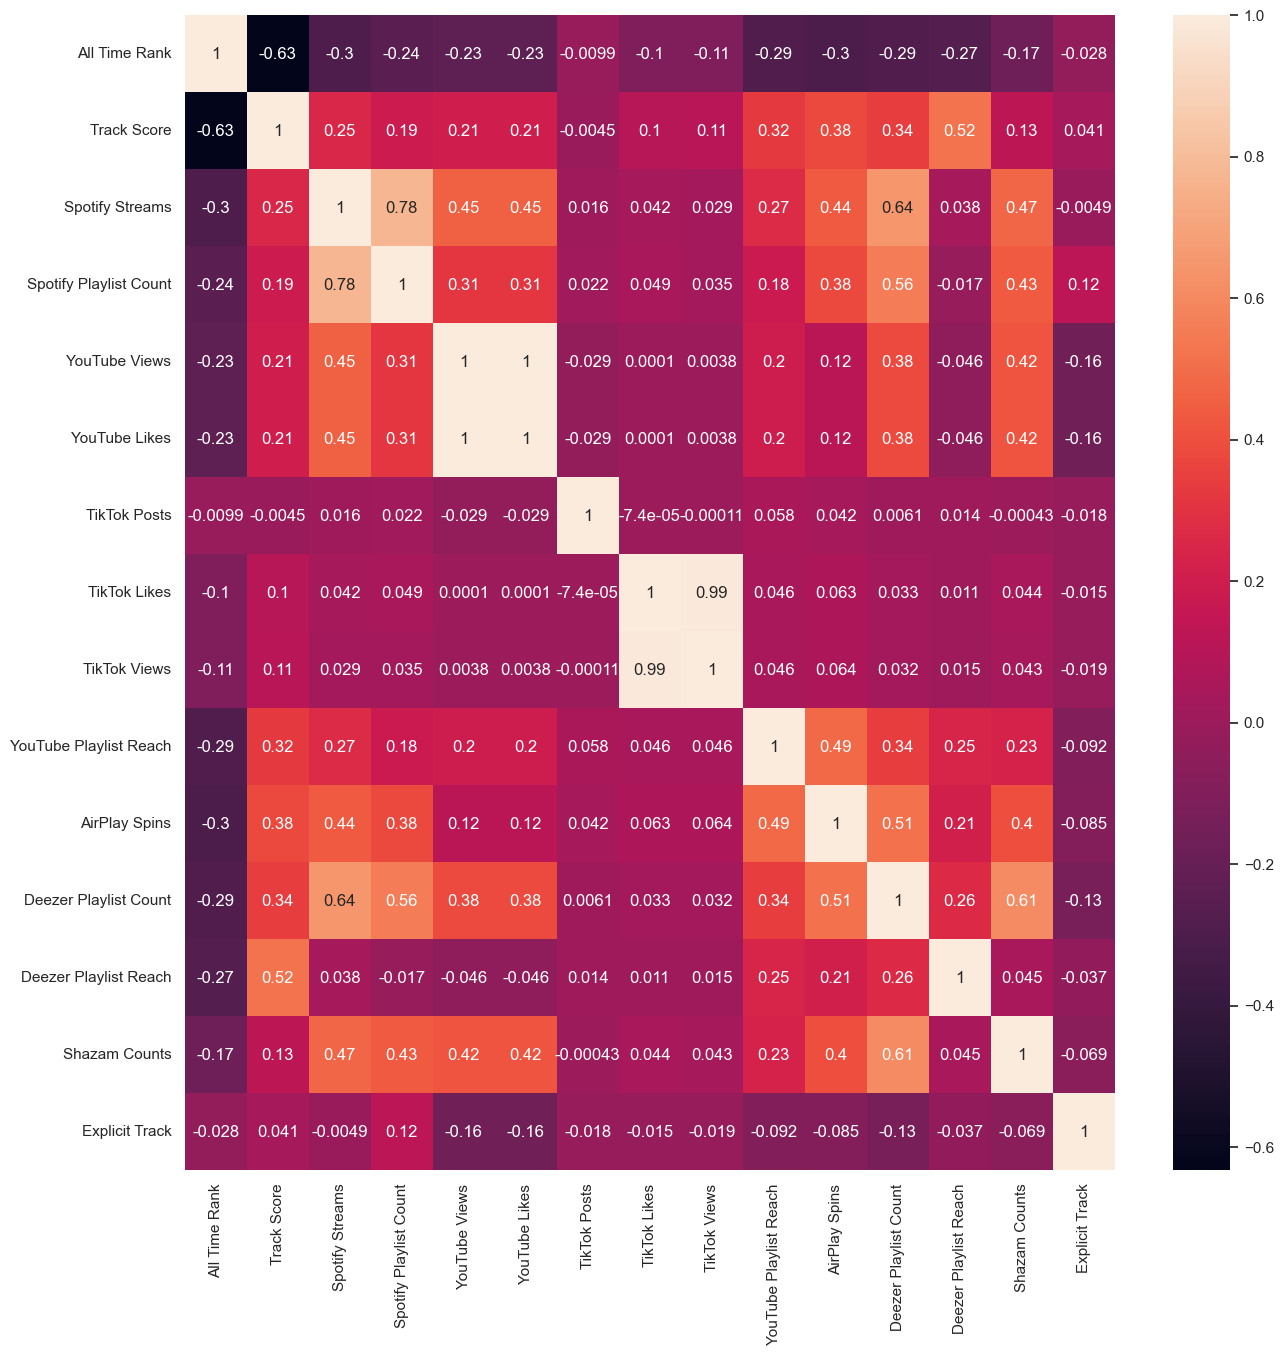

In [244]:
# Heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only = True), annot=True)
plt.show()


### Number of Tracks Per year

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


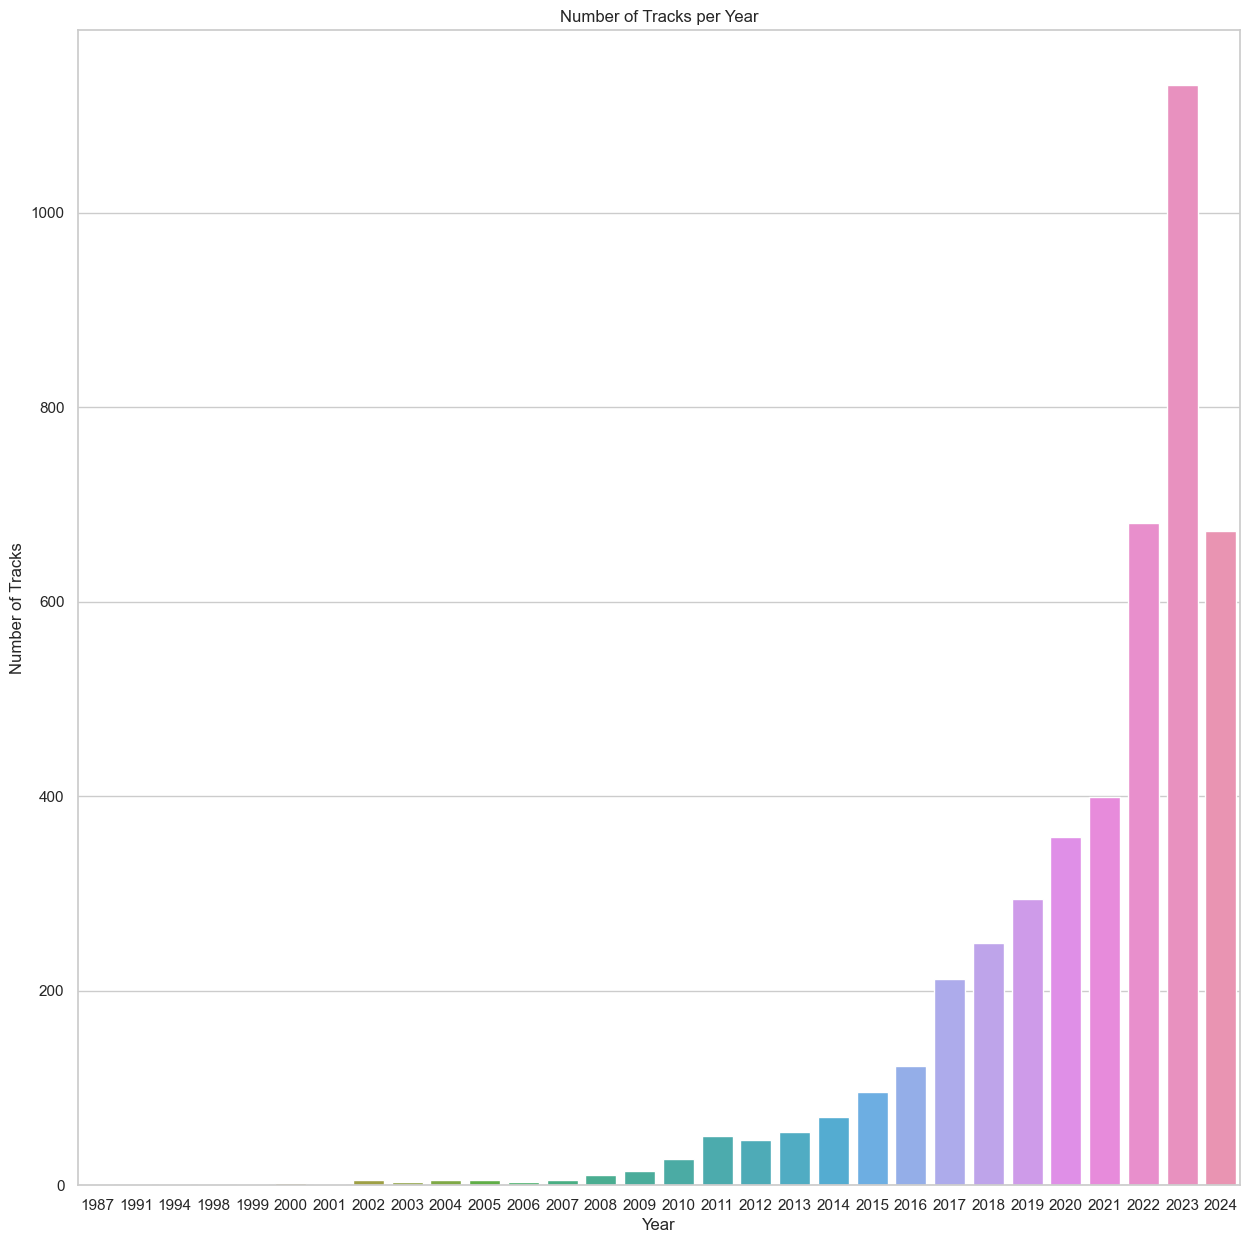

In [245]:
#Extract the year
df['year'] = df['Release Date'].dt.year

timedf = df.groupby('year')['Track'].size().reset_index()
#---

#figure size
plt.figure(figsize=(15,15))

#plotting
sns.barplot(x=timedf['year'], y=timedf['Track'], data=timedf);
plt.title('Number of Tracks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.show();


d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


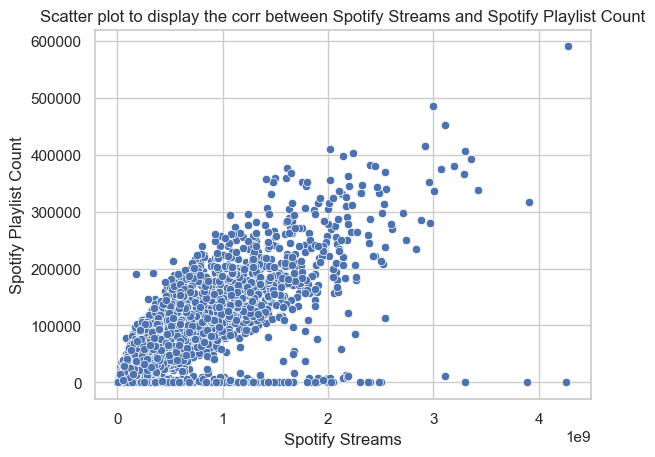

In [246]:
sns.scatterplot(x=df['Spotify Streams'], y=df['Spotify Playlist Count']);
plt.title('Scatter plot to display the corr between Spotify Streams and Spotify Playlist Count');

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


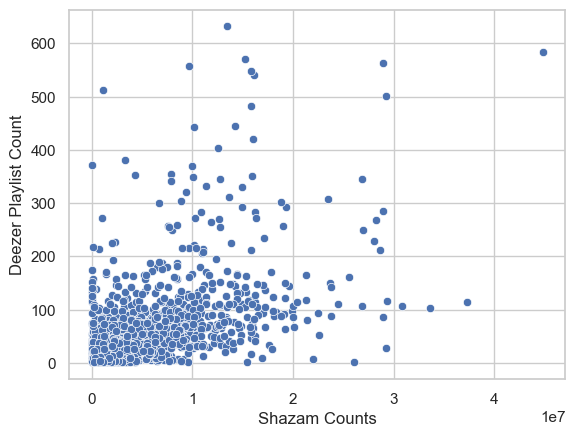

In [250]:
sns.scatterplot(x=df['Shazam Counts'], y=df['Deezer Playlist Count']);


###  What are the tracks for most posts in TikTok


In [251]:
#Group by tracks and sum the tiktok posts in every track column
tiktok_posts_by_track = df.groupby('Track')['TikTok Posts'].sum().reset_index()



In [252]:
# Sort Values
tiktok_posts_by_track = tiktok_posts_by_track.sort_values(by='TikTok Posts', ascending=False)




d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


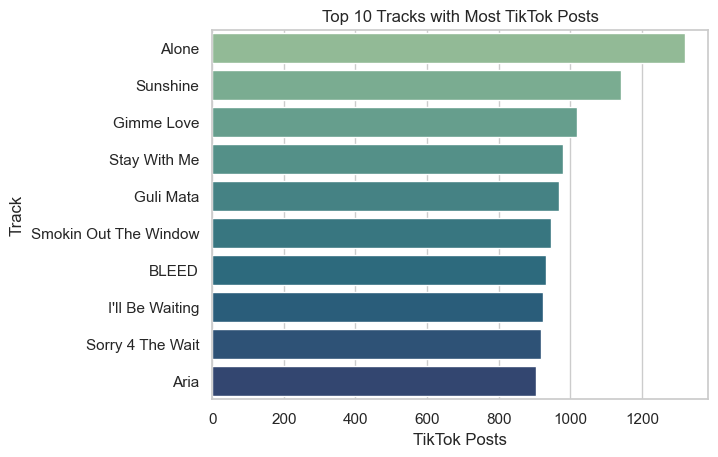

In [253]:
sns.barplot(x='TikTok Posts', y='Track', data=tiktok_posts_by_track.head(10), palette='crest');
plt.title('Top 10 Tracks with Most TikTok Posts');

 ### what are the most popular song in 2023?

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


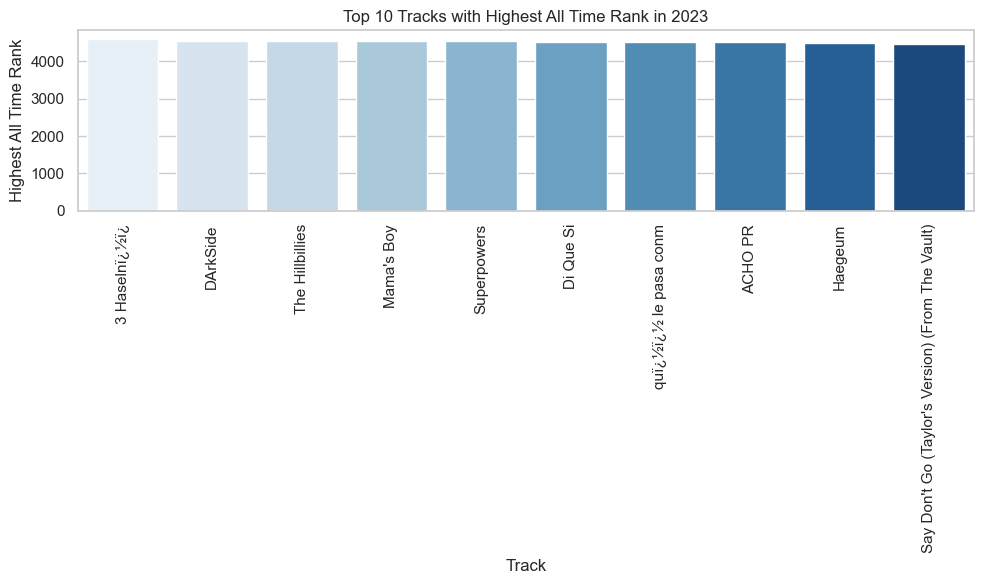

In [258]:
df_2023 = df[df['year'] == 2023]

max_ranks = df_2023.groupby('Track')['All Time Rank'].max().reset_index()

max_ranks = max_ranks.sort_values('All Time Rank', ascending=False)

plt.figure(figsize=(10, 6))  
sns.barplot(x='Track', y='All Time Rank', data=max_ranks.head(10), palette='Blues') 
plt.title('Top 10 Tracks with Highest All Time Rank in 2023')
plt.xlabel('Track')
plt.ylabel('Highest All Time Rank')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### What the best Track and by who?

In [259]:
highest_rank = df['All Time Rank'].max()
artist_highest_rank = df.loc[df['All Time Rank'] == highest_rank, 'Artist'].values[0]

print(f"The highest All Time Rank is: {highest_rank}")
print(f"The artist with the highest All Time Rank is: {artist_highest_rank}")

The highest All Time Rank is: 4595
The artist with the highest All Time Rank is: Jaques Raupï¿


### Number of songs relesed tiil 2024

In [260]:
songs_until_2024 = df[df['year'] <= 2024]['Track'].nunique()

print(f"Number of songs released until 2024: {songs_until_2024}")

Number of songs released until 2024: 3332


### Numbers of Likes and Views for the top 10 tracks

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


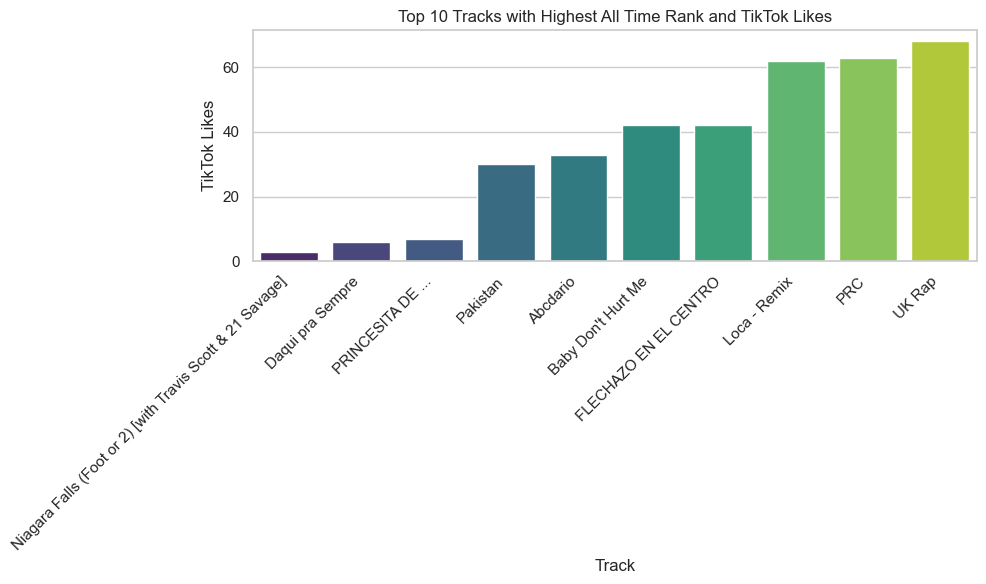

In [270]:
top_10 = df.groupby(['TikTok Likes', 'Track'])['All Time Rank'].apply(lambda x: x.sort_values().head(10)).reset_index()

top_10 = top_10.head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x='Track', y='TikTok Likes', data=top_10, palette='viridis')
plt.title('Top 10 Tracks with Highest All Time Rank and TikTok Likes')
plt.xlabel('Track')
plt.ylabel('TikTok Likes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


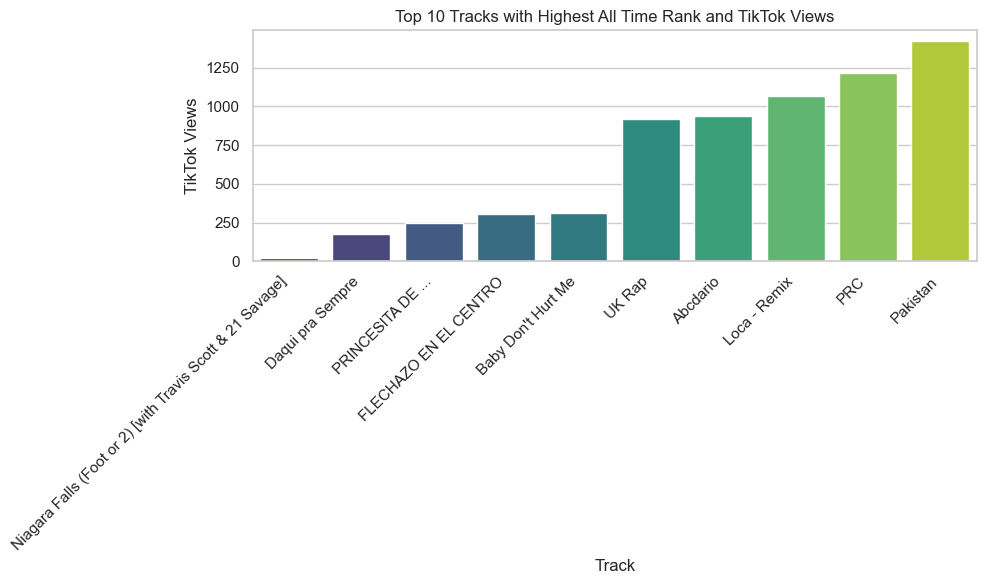

In [269]:
top_10 = df.groupby(['TikTok Views', 'Track'])['All Time Rank'].apply(lambda x: x.sort_values().head(10)).reset_index()

top_10 = top_10.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Track', y='TikTok Views', data=top_10, palette='viridis')
plt.title('Top 10 Tracks with Highest All Time Rank and TikTok Views')
plt.xlabel('Track')
plt.ylabel('TikTok Views')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()